<a href="https://colab.research.google.com/github/DiegoRomanCortes/Regresiones/blob/master/proyeccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np

Datos de casos confirmados de COVID-19 en Chile por día desde el 13 de marzo de 2020: [Fuente de Minsal](https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/)

In [0]:
t = np.array([0,1,2,3,4, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5,15.5, 16.5, 17.5]) #días transcurridos desde 13/03/2020 considerados hasta las 09:00 del mismo día
#desde el 18 de marzo se toman los casos hasta las 21:00 del dia anterior
#14 de marzo alcanzó fase 3
#16 de marzo alcanzó  fase 4

x = np.array([43, 61, 75, 156, 201, 238, 342, 434, 537, 632, 746, 922, 1142, 1306, 1610,1909,2139,2449, 2738]) #casos respectivos totales

r = np.array([8,11,17,22,33,43,61, 75, 156, 156]) #recuperados o dados de alta
m = np.array([0, 1, 2, 3, 4, 5, 6,  7,   8,  12]) #muertos

In [0]:
delta = np.array([])
i = 1
while i < len(x):
  delta = np.append(delta, x[i]-x[i-1])
  i+=1

tasa = np.array([])
i = 1
while i < len(delta):
  tasa = np.append(tasa, delta[i]/delta[i-1])
  i+=1

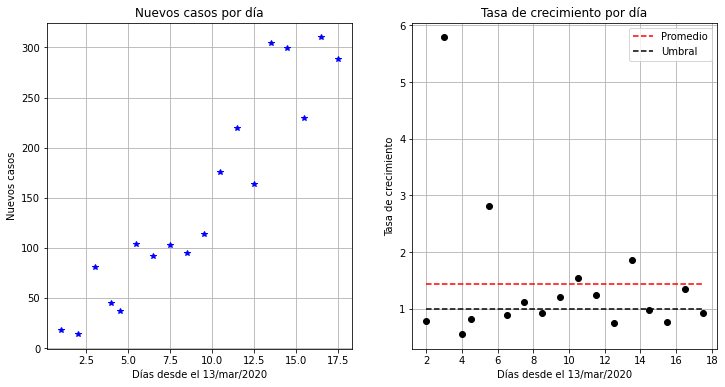

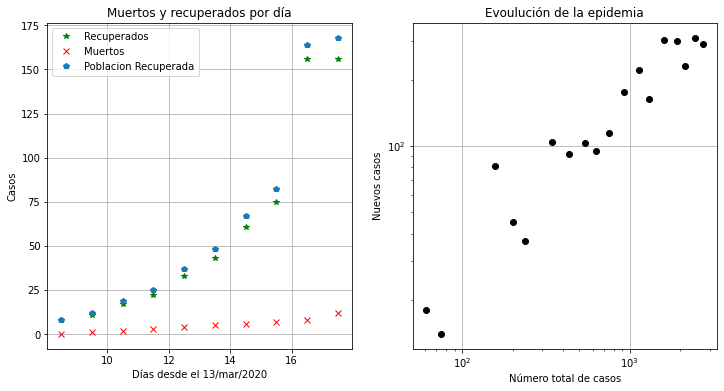

In [4]:
plt.figure(num=1, figsize=[12,6])

plt.subplot(121)
plt.title("Nuevos casos por día")
plt.xlabel("Días desde el 13/mar/2020")
plt.ylabel("Nuevos casos")
plt.grid()
plt.plot(t[1:], delta, "b*")

plt.subplot(122)
plt.title("Tasa de crecimiento por día")
plt.xlabel("Días desde el 13/mar/2020")
plt.ylabel("Tasa de crecimiento")
plt.plot(t[2:],tasa,"ko")
plt.plot(t[2:], np.ones(len(t[2:]))*np.mean(tasa), "r--", label = "Promedio")
plt.plot(t[2:],np.ones(len(t[2:])),"k--", label = "Umbral")
plt.legend()
plt.grid()

plt.figure(num = 2, figsize=[12,6])
plt.subplot(121)
plt.title("Muertos y recuperados por día")
plt.xlabel("Días desde el 13/mar/2020")
plt.ylabel("Casos")
plt.grid()
plt.plot(t[len(t)-len(m):], r, "g*", label = "Recuperados")
plt.plot(t[len(t)-len(m):], m, "rx", label = "Muertos")
plt.plot(t[len(t)-len(m):], r + m, "p", label = "Poblacion Recuperada")
plt.legend()

plt.subplot(122)
plt.plot(x[1:], delta, "ko")
plt.title("Evoulución de la epidemia")
plt.xlabel("Número total de casos")
plt.ylabel("Nuevos casos")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

$x = Ae^{Bt} \implies y = \ln{x} = \ln{A} + Bt$


In [0]:
t_1 = t[8:]
x_1 = x[8:]

t_proy = np.arange(t_1[0], len(t) + 0.5, 0.5)

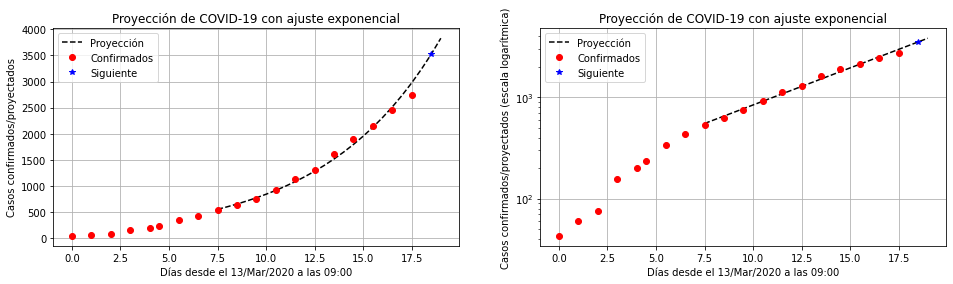

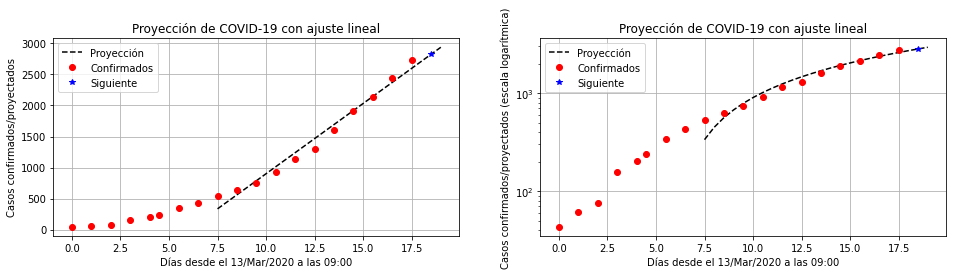

In [6]:
plt.figure(num=1,figsize=[8*2,4])

z = np.polyfit(t_1, np.log(x_1), 1) #retorna coeficientes de mayor a menor
y = z[1] + z[0]*t_proy
x_fit = np.exp(y) #y = ln(x)


plt.subplot(121)
plt.plot(t_proy, x_fit, "k--", label="Proyección")
plt.plot(t, x, "ro", label="Confirmados")

plt.xlabel("Días desde el 13/Mar/2020 a las 09:00")
plt.ylabel("Casos confirmados/proyectados")
plt.title("Proyección de COVID-19 con ajuste exponencial")

new_exp = int(x_fit[-2])
plt.plot(t[-1] + 1, new_exp, "b*", label="Siguiente")
#plt.scatter(t[-1] + 1, 632)

#plt.yscale("log")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(t_proy, x_fit, "k--", label="Proyección")
plt.plot(t, x, "ro", label="Confirmados")

plt.xlabel("Días desde el 13/Mar/2020 a las 09:00")
plt.ylabel("Casos confirmados/proyectados (escala logarítmica)")
plt.title("Proyección de COVID-19 con ajuste exponencial")

plt.plot(t[-1] + 1, new_exp, "b*", label="Siguiente")
#plt.scatter(t[-1] + 1, 632)

plt.yscale("log")
plt.legend()
plt.grid()
plt.show()


plt.figure(num=2,figsize=[8*2,8])

z = np.polyfit(t_1, x_1,1)
y = z[1] + z[0]*t_proy
x_fit = y

plt.subplot(221)
plt.plot(t_proy, x_fit, "k--", label="Proyección")
plt.plot(t, x, "ro", label="Confirmados")

plt.xlabel("Días desde el 13/Mar/2020 a las 09:00")
plt.ylabel("Casos confirmados/proyectados")
plt.title("Proyección de COVID-19 con ajuste lineal")

new_lineal= int(x_fit[-2])
plt.plot(t[-1] + 1, new_lineal, "b*", label="Siguiente")

plt.legend()
plt.grid()

plt.subplot(222)
plt.plot(t_proy, x_fit, "k--", label="Proyección")
plt.plot(t, x, "ro", label="Confirmados")

plt.xlabel("Días desde el 13/Mar/2020 a las 09:00")
plt.ylabel("Casos confirmados/proyectados (escala logarítmica)")
plt.title("Proyección de COVID-19 con ajuste lineal")

plt.plot(t[-1] + 1, new_lineal, "b*", label="Siguiente")
#plt.scatter(t[-1] + 1, 632)

plt.yscale("log")
plt.legend()
plt.grid()



plt.show()

In [7]:
print("El día siguiente habrá", new_exp, "casos (proyección exponencial) o", new_lineal, "casos (proyección lineal)")
print("Es decir,", new_exp - x[-1], "casos (proyección exponencial) o", new_lineal - x[-1], "casos nuevos (proyección lineal)")
print("La actual tasa de crecimiento es de", tasa[-1]*100//1/100)
print("Si se proyecta usando la tasa actual, habría", int(x[-1]+delta[-1]*tasa[-1]), "casos mañana")

El día siguiente habrá 3520 casos (proyección exponencial) o 2824 casos (proyección lineal)
Es decir, 782 casos (proyección exponencial) o 86 casos nuevos (proyección lineal)
La actual tasa de crecimiento es de 0.93
Si se proyecta usando la tasa actual, habría 3007 casos mañana


$tasa = \frac{\Delta X_i}{\Delta X_{i-1}} \implies X_{i+1} - X_i = tasa * \Delta X_i \implies  X_{i+1} =X_i+ tasa * \Delta X_i$